In [115]:
!pwd

/Users/mac/Library/Mobile Documents/com~apple~CloudDocs/GitHub/CAKD07_PROJECT/Dacon_Can_de/WorkSpace/HAN


In [80]:
import os
import cv2
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
pd.set_option('display.max.colwidth', 150)
pd.set_option('display.max.row', 500)

## train_mask  확인

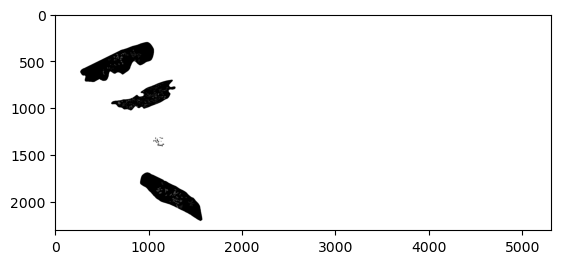

In [75]:
trian_mask_test_img = '../../open/train_masks/BC_01_0015.png'
img = cv2.imread(trian_mask_test_img, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

## 사용자 함수

### 이미지 자르는 사용자 함수

In [102]:
def Img_Crop(input_dir, input_img_list, crop_size, output_dir, flags):
    print('img_crop 중...') 
    output_dir = input_dir+'_cropped'
    if ~os.path.exists(output_dir):
        os.makedirs(output_dir)
    img_list = [os.path.join(input_dir, img_name) for img_name in input_img_list]
    for img in tqdm(img_list):
        cv2_img = cv2.imread(img, flags)
        for row, start_y_pixel in enumerate(range(0, cv2_img.shape[0], crop_size)):
            for col, start_x_pixel in enumerate(range(0, cv2_img.shape[1], crop_size)):
                croped_img = cv2_img[start_y_pixel:start_y_pixel + crop_size, start_x_pixel:start_x_pixel+crop_size]
                cv2.imwrite(f'{output_dir}/{img.split("/")[-1].split(".")[0]}_({row+1:03d},{col+1:03d}).png', croped_img)
    print('완료')

### 명도 측정 사용자 함수

In [51]:
def Value_Measure(input_dir, input_img_list, crop_size):
    print('Value_Measure 중...')
    df = pd.DataFrame(columns=['img_name', 'value', 'class'])
    df['img_name'] = pd.Series(input_img_list)
    img_list = [os.path.join(input_dir, img_name) for img_name in input_img_list]
    for index, img in tqdm(enumerate(img_list)):
        li = []
        cv2_img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
        for i in range(cv2_img.shape[0]):
            for j in range(cv2_img.shape[1]):
                li.append(cv2_img[i,j])
        
        df.loc[index]['value'] = pd.Series(li).value_counts().to_dict()
        
#         if df['class'].iloc[index]
    print('완료')
    return df

## train_masks 이미지 자르기

In [77]:
# train masks dir
train_masks_dir = '../../open/train_masks'
# train masks image list
train_masks_list = sorted(os.listdir(train_masks_dir))[1:]


# 크롭하려는 img 폴더
input_dir = train_masks_dir
# 크롭하려는 img list
input_img_list = train_masks_list[10:15]
# 크롭할 사이즈
crop_size = 488
# 크롬된 img 저장 폴더
output_dir = '../../open/train_masks_cropped'

# image cropping
Img_Crop(input_dir, input_img_list, crop_size, output_dir, cv2.IMREAD_GRAYSCALE)

['BC_01_0459.png', 'BC_01_0471.png', 'BC_01_0510.png', 'BC_01_0515.png', 'BC_01_0516.png']
img_crop 중...


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  8.42it/s]

완료


## train_imgs 이미지 자르기

In [46]:
# train masks dir
train_imgs_dir = '../../open/train_imgs'
# train masks image list
train_imgs_list = sorted(os.listdir(train_masks_dir))[1:]



# 크롭하려는 img 폴더
input_dir = train_imgs_dir
# 크롭하려는 img list
input_img_list = train_imgs_list
# 크롭할 사이즈
crop_size = 488
# 크롬된 img 저장 폴더
output_dir = '../../open/train_imgs_cropped'

# image cropping
Img_Crop(input_dir, input_img_list[:1], crop_size, output_dir, cv2.IMREAD_UNCHANGED)

img_crop 중...


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.75it/s]

완료


## 명도 측정

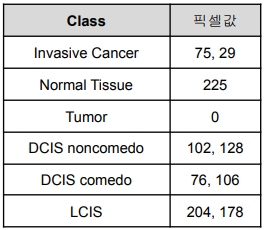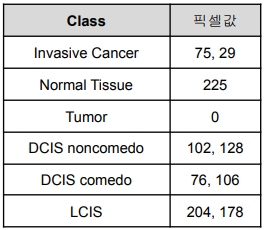

In [79]:
cropped_train_mask_img_dir = '../../open/train_masks_cropped'
cropped_train_mask_img_list = sorted(os.listdir(cropped_train_mask_img_dir))[1:]


# 명도 측정할 img 폴더
input_dir = cropped_train_mask_img_dir
# 명도 측정할 img list
input_img_list = cropped_train_mask_img_list
# 크롭할 사이즈
crop_size = crop_size


df = Value_Measure(input_dir, input_img_list, crop_size)
df


Value_Measure 중...


380it [04:08,  1.53it/s]

완료


,img_name,value,class
0,"BC_01_0459_(001,001).png","{255: 224153, 0: 13991}",NaN
1,"BC_01_0459_(001,002).png","{255: 216548, 0: 21596}",NaN
2,"BC_01_0459_(001,003).png",{255: 238144},NaN
3,"BC_01_0459_(001,004).png",{255: 238144},NaN
4,"BC_01_0459_(001,005).png",{255: 238144},NaN
...,...,...,...
375,"BC_01_0516_(006,009).png",{255: 237656},NaN
376,"BC_01_0516_(006,010).png",{255: 237656},NaN
377,"BC_01_0516_(006,011).png",{255: 237656},NaN
378,"BC_01_0516_(006,012).png",{255: 237656},NaN


# test

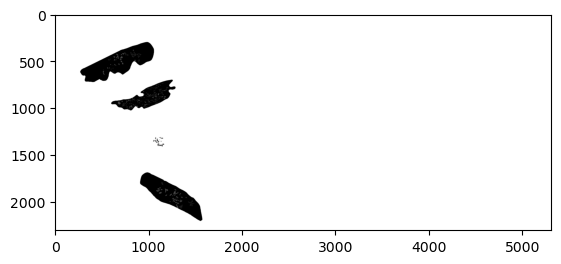

[0 0 0]


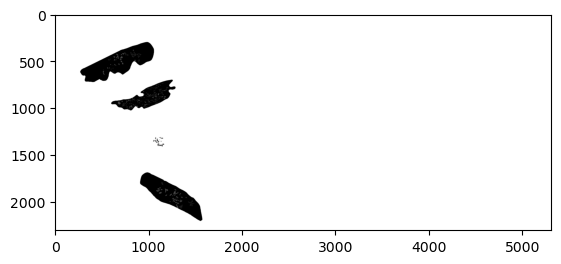

[0 0 0]


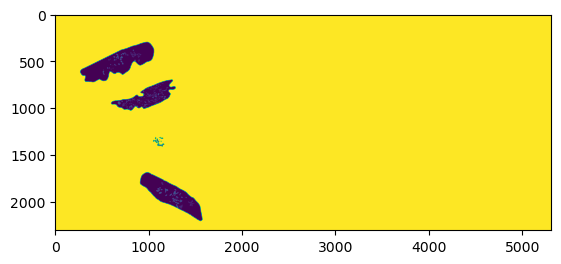

0


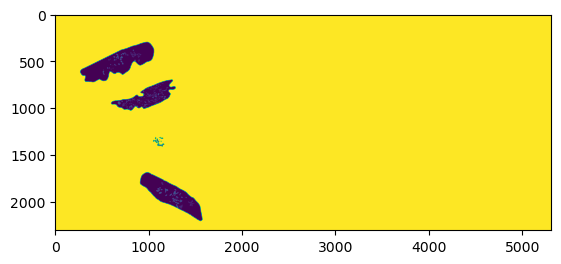

0


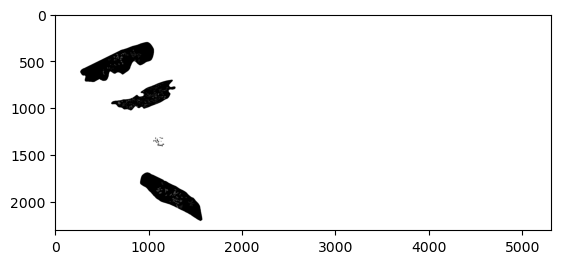

0


In [198]:
img_test_1 = cv2.imread('../../open//train_masks/BC_01_0015.png')
plt.imshow(img_test_1)
plt.show()
print(img_test_1[1000,900])

plt.imshow(img_test_1, cmap='gray')
plt.show()
print(img_test_1[1000,900])

plt.imshow(cv2.cvtColor(img_test_1, cv2.COLOR_BGR2GRAY))
plt.show()
print(img_test_2[1000,900])

img_test_2 = cv2.imread('../../open//train_masks/BC_01_0015.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_test_2)
plt.show()
print(img_test_2[1000,900])

plt.imshow(img_test_2, cmap='gray')
plt.show()
print(img_test_2[1000,900])

# cv2.imwrite('./test_1.png', img_test)